# **Import**

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Data Load**

In [3]:
cd /content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data

/content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data


In [4]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f's_{i + 1}' for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_df = pd.read_csv('./train_FD004.txt',
                       sep='\s+',
                       header=None,
                       index_col=False,
                       names=col_names)
test_df = pd.read_csv('./test_FD004.txt',
                      sep='\s+',
                      index_col=False,
                      names=col_names)
RUL_df = pd.read_csv('./RUL_FD004.txt',
                     sep='\s+',
                     index_col=False,
                     names=['RUL'])

In [5]:
train_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [6]:
train_df.to_csv('./train_FD004.csv')

In [7]:
test_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [8]:
test_df.to_csv('./test_FD004.csv')

In [9]:
RUL_df

,RUL
0,22
1,39
2,107
3,75
4,149
...,...
243,35
244,131
245,194
246,112


In [10]:
RUL_df.to_csv('./RUL_FD004.csv')

# **EDA**

## **s1 ~ s21**

In [11]:
max_cycle = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycle, on='unit_number', how='left')

train_df['RUL'] = train_df['max_cycle'] - train_df['time_cycles']

In [12]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data_rolling = unit_data.rolling(10).mean()
        plt.plot(unit_data_rolling['RUL'], unit_data_rolling[sensor], alpha=0.7)

        sensor_values.extend(unit_data_rolling[sensor].dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(sensor)
    plt.title(f'Trend of {sensor} Across Sampled Units (Std: {sensor_std:.2f})')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).mean()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

        sensor_values.extend(sensor_norm_rolling.dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling mean)')
    plt.title(f'Normalized Trend of {sensor} Across Units (Std: {sensor_std:.2f})')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [14]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()

        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [15]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).std()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling std)')
    plt.title(f'Normalized Trend of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [16]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [17]:
for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        rolling_std_norm = (unit_data['rolling_std'] - unit_data['rolling_std'].min()) / \
                           (unit_data['rolling_std'].max() - unit_data['rolling_std'].min())
        plt.plot(unit_data['RUL'], rolling_std_norm, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Normalized Rolling Std')
    plt.title(f'Normalized Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

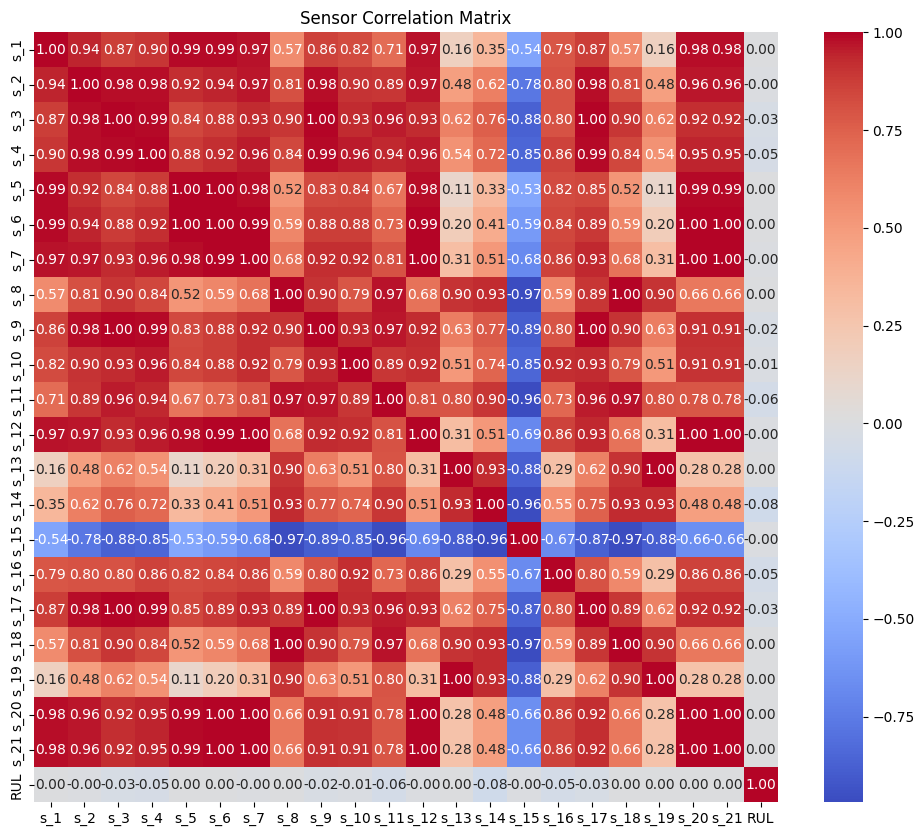

In [18]:
sensor_data = train_df[sensor_names + ['RUL']]
corr = sensor_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sensor Correlation Matrix")
plt.show()

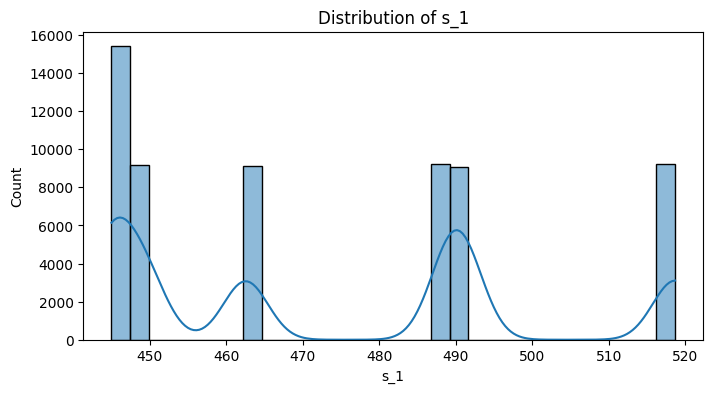

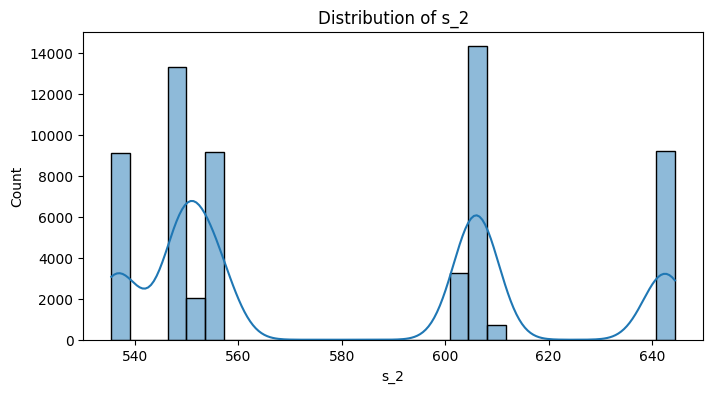

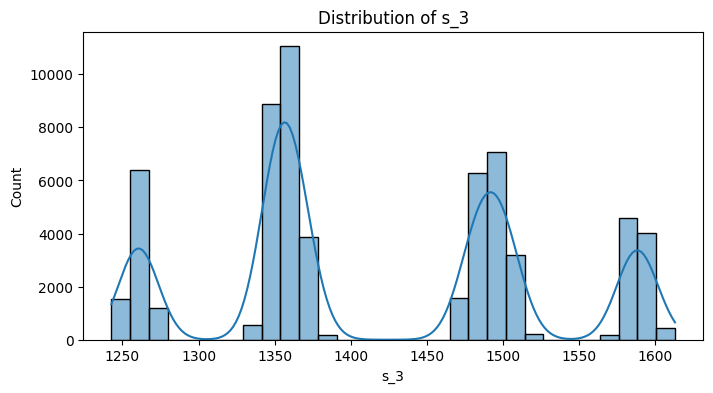

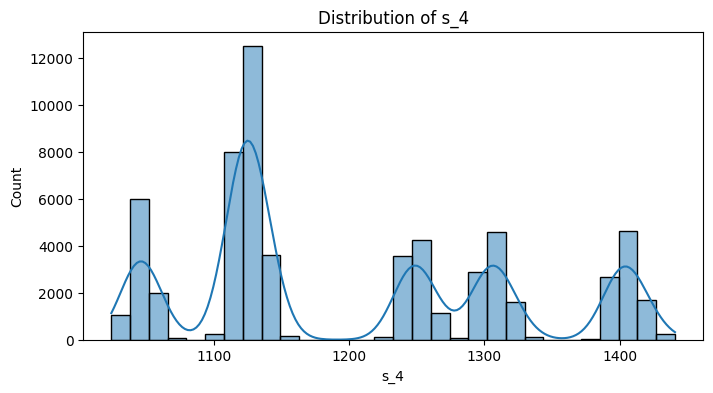

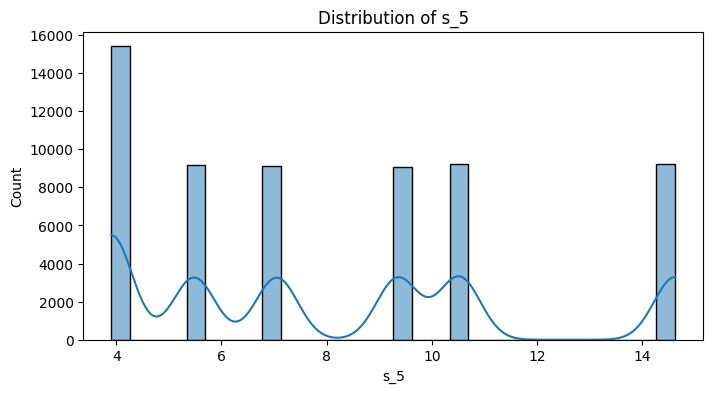

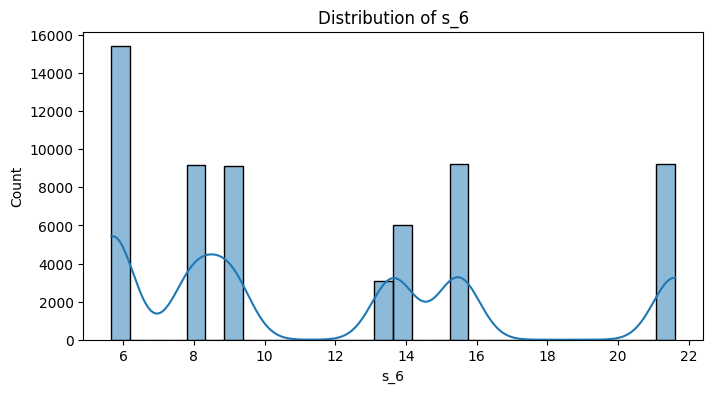

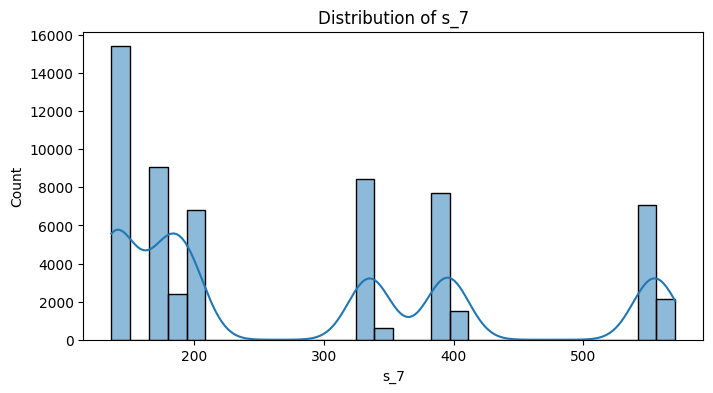

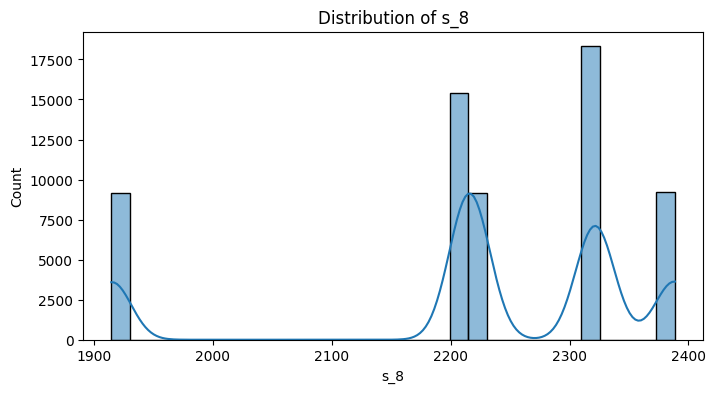

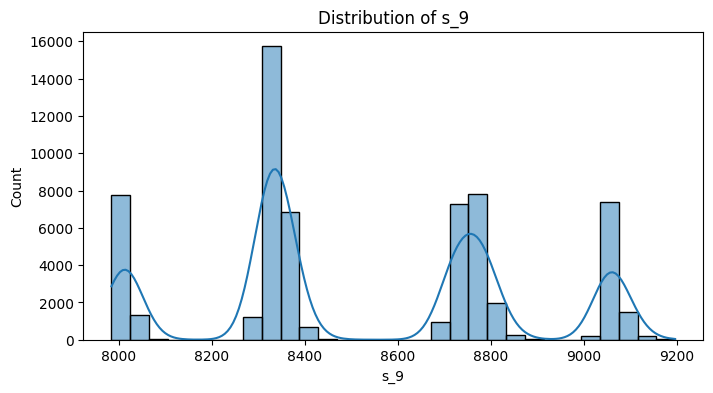

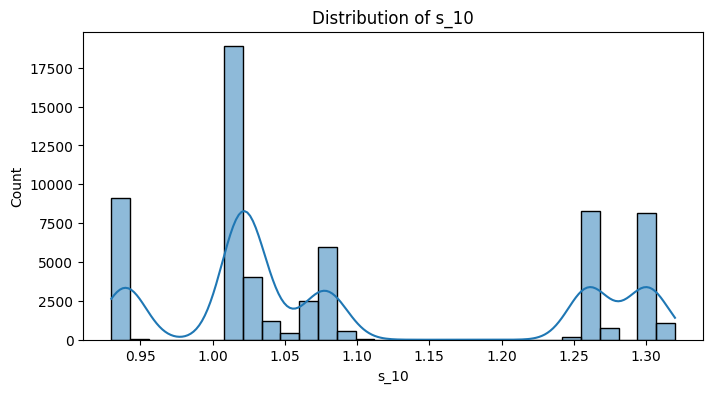

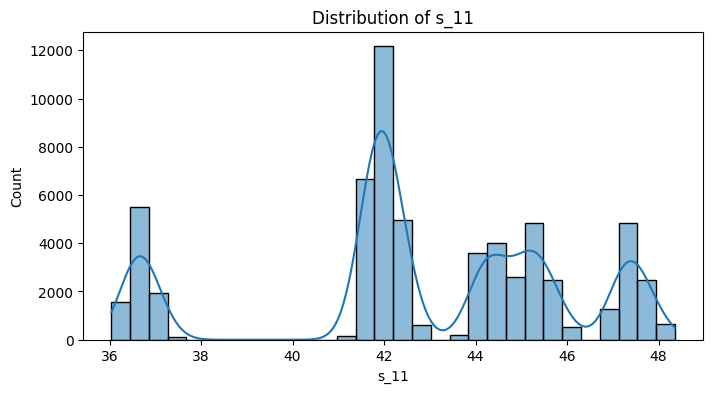

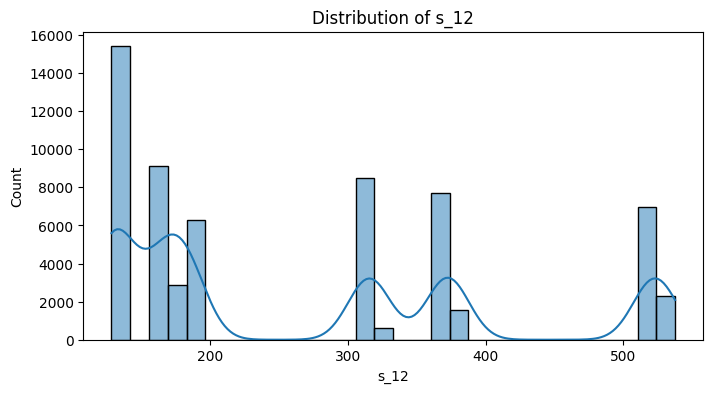

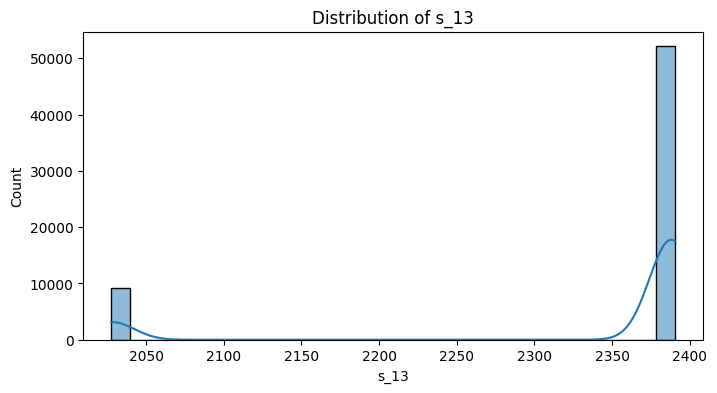

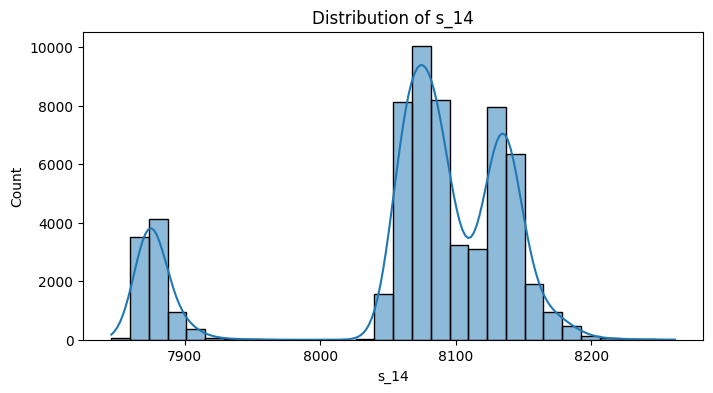

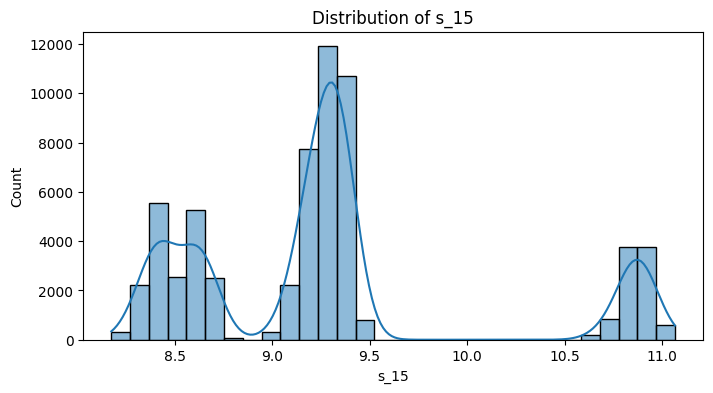

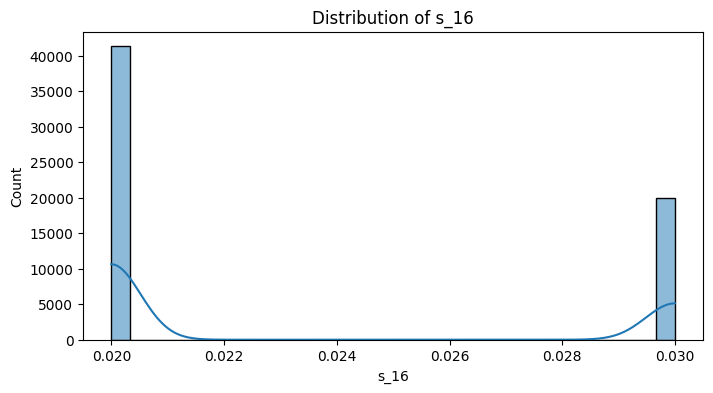

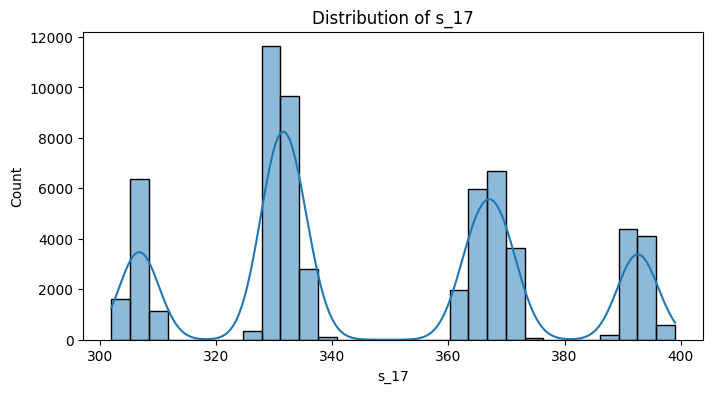

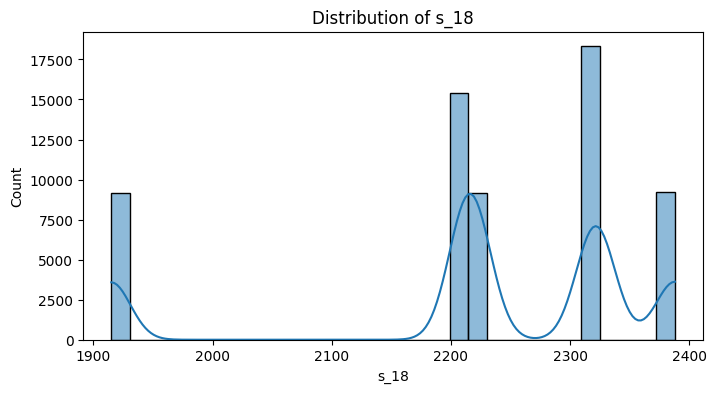

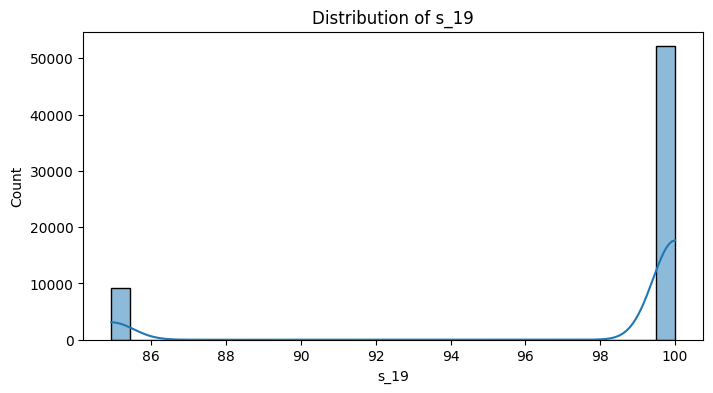

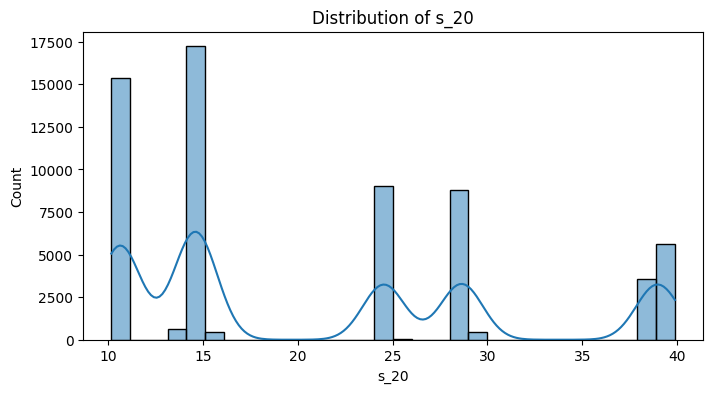

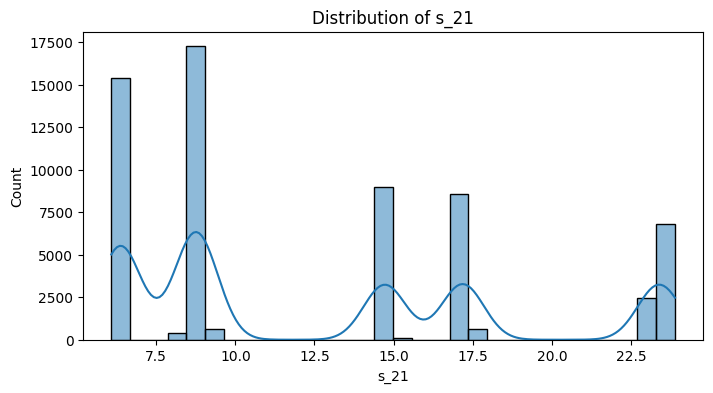

In [19]:
for sensor in sensor_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.show()